In [1]:
# CHRONIC KIDNEY DISEASE

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
df = pd.read_csv(r"C:\Users\KIIT\Desktop\MachineLearning\Paper1\Codes\datasets_1111_2005_kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
#Dropping the ID, Sodium and Pottasium columns
df.drop(["id"],axis=1,inplace=True) 
df.drop(["age"],axis=1,inplace=True)
df.drop(["bp"],axis=1,inplace=True)
df.drop(["su"],axis=1,inplace=True)
df.drop(["rbc"],axis=1,inplace=True) 
df.drop(["pcc"],axis=1,inplace=True)
df.drop(["ba"],axis=1,inplace=True)
df.drop(["bu"],axis=1,inplace=True) 
df.drop(["sod"],axis=1,inplace=True)
df.drop(["pot"],axis=1,inplace=True)
df.drop(["pcv"],axis=1,inplace=True) 
df.drop(["wc"],axis=1,inplace=True)
df.drop(["rc"],axis=1,inplace=True)
df.drop(["dm"],axis=1,inplace=True)
df.drop(["cad"],axis=1,inplace=True) 
df.drop(["appet"],axis=1,inplace=True)
df.drop(["pe"],axis=1,inplace=True)
df.drop(["ane"],axis=1,inplace=True)

In [4]:
#Number of missing values in features
df.isnull().sum()

sg                47
al                46
pc                65
bgr               44
sc                17
hemo              52
htn                2
classification     0
dtype: int64

In [5]:
#Filling missing data with mean value
df["bgr"]= df["bgr"].fillna(np.mean(df["bgr"]))
df["sc"]= df["sc"].fillna(np.mean(df["sc"]))
df["hemo"]= df["hemo"].fillna(np.mean(df["hemo"]))
df["sg"]= df["sg"].fillna(np.mean(df["sg"]))
df['al'].fillna(df['al'].value_counts().idxmax(), inplace=True)

In [6]:
#Assigned the value 0 and 1 to the nominal features
df['pc'] = df.pc.replace(['normal','abnormal'], ['1', '0'])
df['htn'] = df.htn.replace(['yes','no'], ['1', '0'])

In [7]:
#The number "1" is indicated by "ckd" (the condition of kidney disease) and the number 
#"0" is indicated by "notckd" (the state of the absence of kidney disease).
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]
df.classification = pd.to_numeric(df.classification, errors='coerce')

In [8]:
#Then converted them to numeric data type
df.pc = pd.to_numeric(df.pc, errors='coerce')
df.htn = pd.to_numeric(df.htn, errors='coerce')
#Number of missing values in features
df.isnull().sum()

sg                 0
al                 0
pc                65
bgr                0
sc                 0
hemo               0
htn                2
classification     0
dtype: int64

In [9]:
#Dropping all other rows with NaN values
df = df.dropna(axis=0)
#Number of missing values in features
df.isnull().sum()

sg                0
al                0
pc                0
bgr               0
sc                0
hemo              0
htn               0
classification    0
dtype: int64

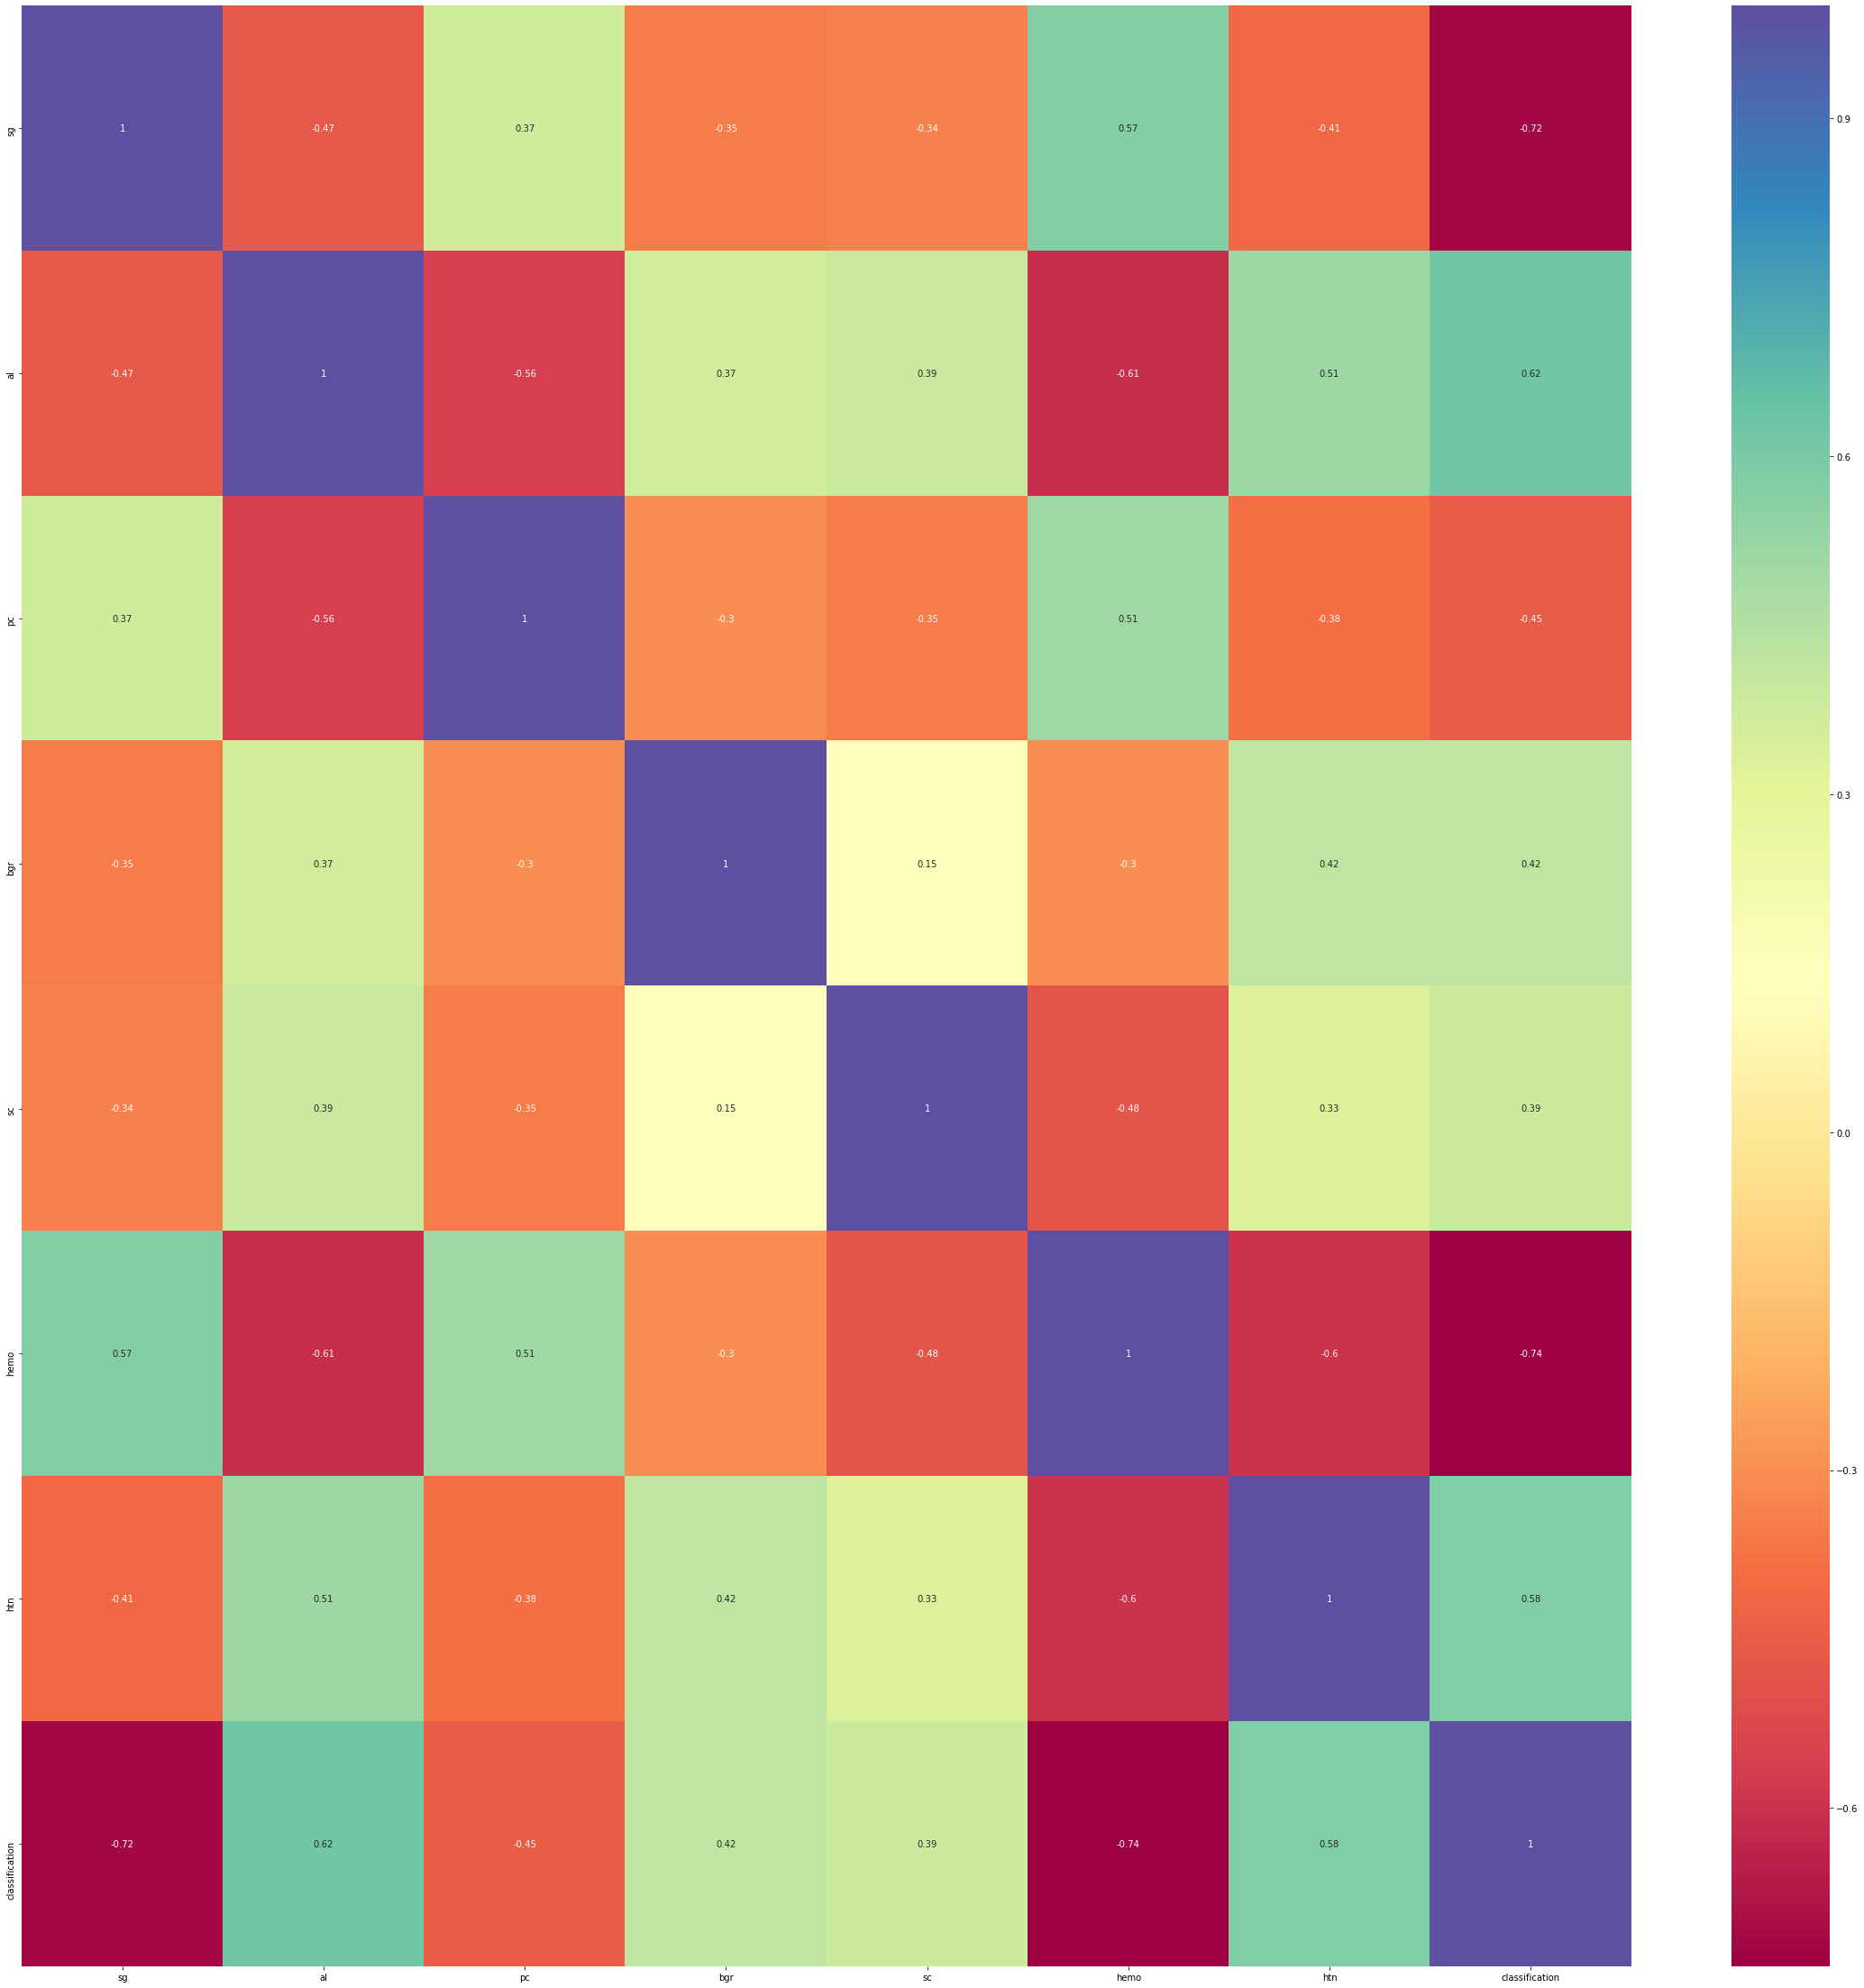

In [10]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Spectral")

In [11]:
#Importing the dataset to X and y variables
X = df.iloc[:, :-1].values
y = df.iloc[:,7].values
X
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
#Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 100)

In [13]:
df["classification"].value_counts()

1    193
0    140
Name: classification, dtype: int64

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

0.9701492537313433
0.9701492537313433
[0.97058824 0.91176471 1.         0.93939394 0.81818182 1.
 0.96969697 0.93939394 0.87878788 0.96969697]
0.9397504456327986
r2 score : 0.8784029038112523
precision: [0.96551724 0.97368421]
recall: [0.96551724 0.97368421]
fscore: [0.96551724 0.97368421]
support: [29 38]


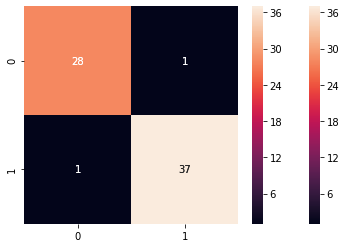

In [15]:
##### LOGISTIC REGRESSION
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test, y_test))
# Predicting the Test set results
y_pred_lr = lr.predict(X_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_lr))

from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
import seaborn as sns
sns.heatmap(cm_lr, annot=True)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr_kfold = confusion_matrix(y_test, y_pred_lr)
import seaborn as sns
sns.heatmap(cm_lr, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_lr)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_lr)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.9850746268656716
0.9850746268656716
[0.94117647 0.91176471 0.97058824 0.87878788 0.93939394 1.
 0.87878788 0.87878788 0.81818182 0.93939394]
0.9156862745098039
r2 score : 0.9392014519056261
precision: [1.         0.97435897]
recall: [0.96551724 1.        ]
fscore: [0.98245614 0.98701299]
support: [29 38]


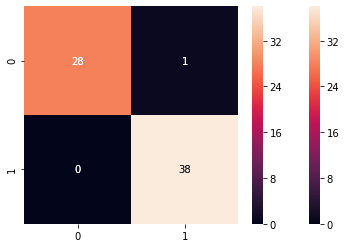

In [16]:
##### K - NN
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_kn.fit(X_train, y_train)
print(classifier_kn.score(X_test, y_test))
# Predicting the Test set results
y_pred_kn = classifier_kn.predict(X_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_kn))

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_kn, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_kn = confusion_matrix(y_test, y_pred_kn)
import seaborn as sns
sns.heatmap(cm_kn, annot=True)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_kn_kfold = confusion_matrix(y_test, y_pred_kn)
import seaborn as sns
sns.heatmap(cm_kn, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_kn)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_kn)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.9701492537313433
0.9701492537313433
[0.94117647 0.97058824 0.94117647 0.96969697 0.90909091 0.93939394
 1.         1.         0.93939394 0.96969697]
0.9580213903743313
r2 score : 0.8784029038112523
precision: [0.96551724 0.97368421]
recall: [0.96551724 0.97368421]
fscore: [0.96551724 0.97368421]
support: [29 38]


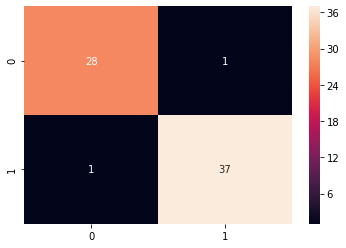

In [17]:
##### SVM
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)
print(classifier_svm.score(X_test, y_test))
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_svm))

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_svm, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
import seaborn as sns
sns.heatmap(cm_svm, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_svm)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_svm)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


0.9850746268656716
[0.91176471 0.97058824 0.94117647 0.90909091 0.90909091 0.90909091
 0.96969697 0.87878788 0.87878788 0.96969697]
0.9247771836007128
r2 score : 0.9392014519056261
precision: [1.         0.97435897]
recall: [0.96551724 1.        ]
fscore: [0.98245614 0.98701299]
support: [29 38]


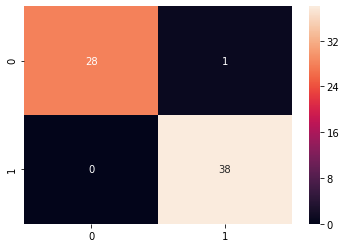

In [18]:
##### KERNEL SVM
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm.fit(X_train, y_train)
print(classifier_ksvm.score(X_test, y_test))
# Predicting the Test set results
y_pred_ksvm = classifier_ksvm.predict(X_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_ksvm, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
import seaborn as sns
sns.heatmap(cm_ksvm, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_ksvm)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_ksvm)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.9104477611940298
[0.94117647 0.94117647 1.         0.93939394 0.84848485 0.96969697
 0.93939394 0.93939394 0.90909091 1.        ]
0.9427807486631016
r2 score : 0.6352087114337568
precision: [0.84848485 0.97058824]
recall: [0.96551724 0.86842105]
fscore: [0.90322581 0.91666667]
support: [29 38]


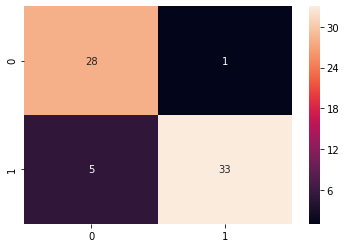

In [19]:
##### NAIVE BAYES
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
print(classifier_NB.score(X_test, y_test))
# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_NB, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
import seaborn as sns
sns.heatmap(cm_NB, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_NB)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_NB)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.9850746268656716
[0.94117647 1.         0.97058824 1.         0.96969697 0.96969697
 0.93939394 1.         1.         1.        ]
0.9790552584670232
r2 score : 0.9392014519056261
precision: [1.         0.97435897]
recall: [0.96551724 1.        ]
fscore: [0.98245614 0.98701299]
support: [29 38]


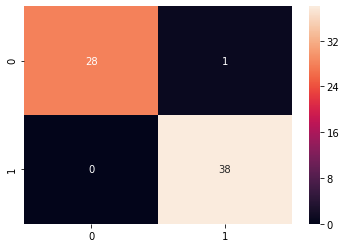

In [20]:
##### DECISION TREE
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
print(classifier_dt.score(X_test, y_test))
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_dt, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
import seaborn as sns
sns.heatmap(cm_dt, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_dt)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_dt)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.9850746268656716
[0.97058824 1.         0.97058824 0.96969697 0.96969697 0.96969697
 0.93939394 0.96969697 1.         1.        ]
0.9759358288770054
r2 score : 0.9392014519056261
precision: [1.         0.97435897]
recall: [0.96551724 1.        ]
fscore: [0.98245614 0.98701299]
support: [29 38]


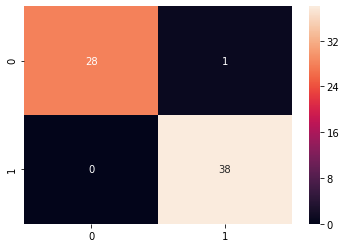

In [21]:
##### RANDOM FOREST
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
print(classifier_rf.score(X_test, y_test))
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_rf, X, y, cv=10)
print(score)
print(score.mean())

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
import seaborn as sns
sns.heatmap(cm_rf, annot=True)

from sklearn.metrics import r2_score
r2_fr = r2_score(y_test, y_pred_rf)
print("r2 score :", r2_fr)

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_rf)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [22]:
# prepare models
models = []
models.append(('    LR', LogisticRegression()))
models.append(('   KNN', KNeighborsClassifier()))
models.append(('   SVM', SVC()))
models.append(('K-SVM', SVC(kernel='rbf')))
models.append(('    NB', GaussianNB()))
models.append(('   DT', DecisionTreeClassifier()))
models.append(('   RF', RandomForestClassifier()))


In [23]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    LR: 0.943048 (0.047056)
   KNN: 0.892157 (0.061576)
   SVM: 0.906595 (0.048085)
K-SVM: 0.906595 (0.048085)
    NB: 0.946168 (0.053098)
   DT: 0.954902 (0.036494)
   RF: 0.975758 (0.035339)


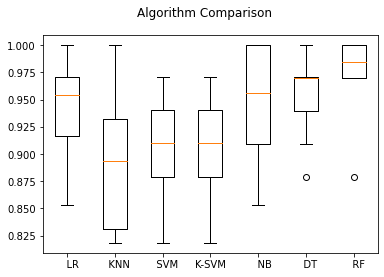

In [24]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

In [27]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               KNeighborsClassifier(), 
               GaussianNB(), 
               #SVC(),
               #SVC(random_state = 1234),
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [28]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [29]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

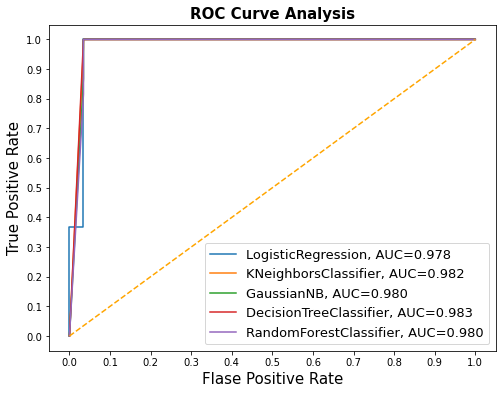

In [78]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()